# Desafio 1 - Prática com Perceptron para Classificar o Dataset Breast Cancer

Utilizar os conceitos apresentados neste bloco de aprendizado para aplicar o classificador Perceptron no dataset Breast Cancer que se encontra anexo. Observar que deve haver uma preparação dos dados no pré-processamento. Este dataset possui somente 2 possibilidades de classificação (Malígno ou Benígno). Caso ainda tenha interesse e tempo de estudo, com a finalidade de aperfeiçoar a base de dados para a classificação, sugiro pesquisar sobre como ajustar os outliers do dataset e comparar a classificação para a situação sem ajuste de outliers. Após 7 dias será disponibilizada a resolução desta atividade.

Link com o dataset e explicações: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Criação do DataFrame através do dataset
df = pd.read_csv('BreastCancerWisconsinDataSet.csv')
display(df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
# Maneiras de obter o total de total de Malignos e Benignos
print(df.loc[df['diagnosis'] == 'B', ['diagnosis']].groupby('diagnosis').size())
print(df.loc[df['diagnosis'] == 'M', ['diagnosis']].groupby('diagnosis').size())

benigno_total = df.loc[df['diagnosis'] == 'B', ['diagnosis']].groupby('diagnosis').value_counts().values
maligno_total = df.loc[df['diagnosis'] == 'M', ['diagnosis']].groupby('diagnosis').value_counts().values

print("Total de tumores Benignos: ", benigno_total)
print("Total de tumores Malignos: ", maligno_total)

diagnosis
B    357
dtype: int64
diagnosis
M    212
dtype: int64
Total de tumores Benignos:  [357]
Total de tumores Malignos:  [212]


In [4]:
# Criação do vetor de classificação Benigno e Maligno
y = df.iloc[:, 1].values
display(y)

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [5]:
# Normalização do vetor de classifiação para 1 e -1
y = np.where(y == 'B', 1, -1)
display(y)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,
        1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1

In [6]:
# Criação do dataset completo com os vetores de entrada - radius_mean,	radius_se,	radius_worst
X = df.iloc[:, [2,12,22]].values
display(X)

array([[17.99  ,  1.095 , 25.38  ],
       [20.57  ,  0.5435, 24.99  ],
       [19.69  ,  0.7456, 23.57  ],
       ...,
       [16.6   ,  0.4564, 18.98  ],
       [20.6   ,  0.726 , 25.74  ],
       [ 7.76  ,  0.3857,  9.456 ]], shape=(569, 3))

In [7]:
# Normlização dos dados de entrada para valores entre 0 e 1
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
display(X)

array([[0.52103744, 0.35614702, 0.62077552],
       [0.64314449, 0.15643672, 0.60690146],
       [0.60149557, 0.22962158, 0.55638563],
       ...,
       [0.45525108, 0.12489589, 0.39309854],
       [0.64456434, 0.22252399, 0.63358236],
       [0.03686876, 0.09929386, 0.05428673]], shape=(569, 3))

<function matplotlib.pyplot.show(close=None, block=None)>

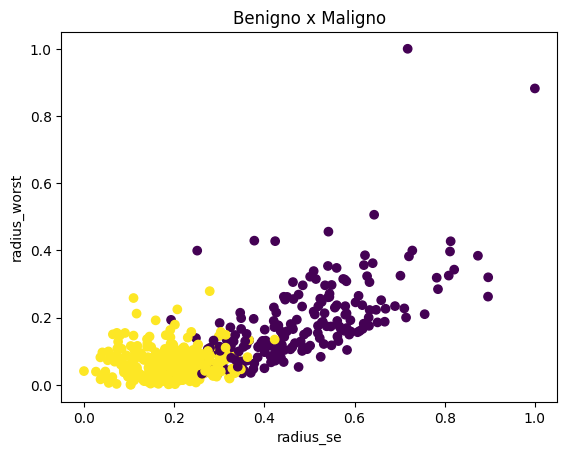

In [8]:
# plotando o gráfico para verificação se as amostras são linearmente separáveis
plt.scatter(X[:,2],X[:,1],c=y)
plt.title("Benigno x Maligno" )
plt.xlabel('radius_se')
plt.ylabel('radius_worst')
plt.show

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=0.30)

In [10]:
p = Perceptron(random_state=42, eta0=0.001, penalty='elasticnet')
p.fit(X_train, y_train)

,penalty,'elasticnet'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,0.001
,n_jobs,None
,random_state,42


In [11]:
prediction_train = p.predict(X_train)
train_score = accuracy_score(prediction_train, y_train)
print("A acurácia com dados de treinamento: ", train_score)

A acurácia com dados de treinamento:  0.9020100502512562


In [12]:
prediction_test = p.predict(X_test)
test_score = accuracy_score(prediction_test, y_test)
print("A acurácia com dados de teste: ", test_score)

print(classification_report(prediction_test, y_test))
print("Número de épocas: ", p.n_iter_)

A acurácia com dados de teste:  0.8654970760233918
              precision    recall  f1-score   support

          -1       0.83      0.82      0.82        65
           1       0.89      0.90      0.89       106

    accuracy                           0.87       171
   macro avg       0.86      0.86      0.86       171
weighted avg       0.87      0.87      0.87       171

Número de épocas:  6


In [13]:
y_test_df = pd.DataFrame(y_test)
maligno_df = y_test_df.loc[y_test_df[0] == -1]
benigno_df = y_test_df.loc[y_test_df[0] == 1]
display(maligno_df.size)
display(benigno_df.size)

64

107

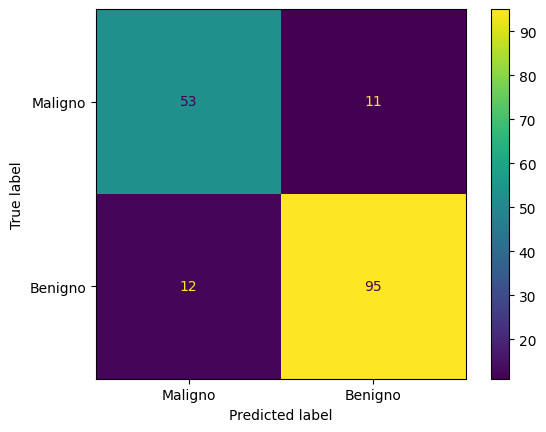

In [14]:
conf_matrix = confusion_matrix(y_test, prediction_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Maligno','Benigno'])
cm_display.plot()

# Tratamento de Outliers

- [Como Tratar outliers](https://franciscofoz.medium.com/como-tratar-outliers-sem-exclu%C3%AD-los-19dd5c1ba3e6)
- [Formas de encontrar outliers](https://www.felipealencar.net/2021/03/4-formas-de-encontrar-outliers-em-seus.html#:~:text=Utilizando%20gr%C3%A1ficos%20para%20identificar%20outliers,encontrados%20no%20conjunto%20de%20dados)

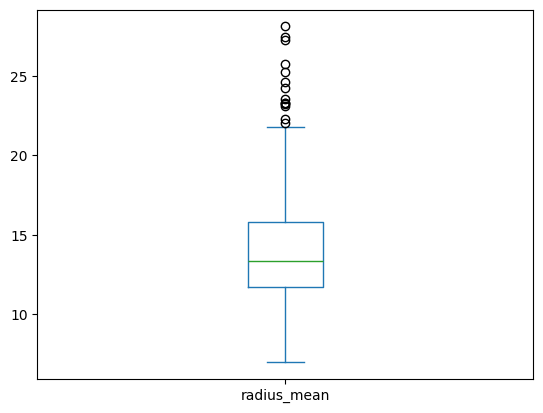

In [15]:
df['radius_mean'].plot(kind='box')
c=np.where(df['radius_mean'] >= 22)
df.drop(df.index[c], inplace=True)

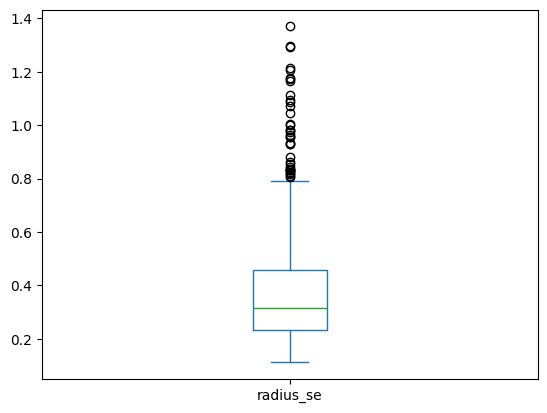

In [16]:
df['radius_se'].plot(kind='box')
c=np.where(df['radius_se'] >= 1.22)
df.drop(df.index[c], inplace=True)

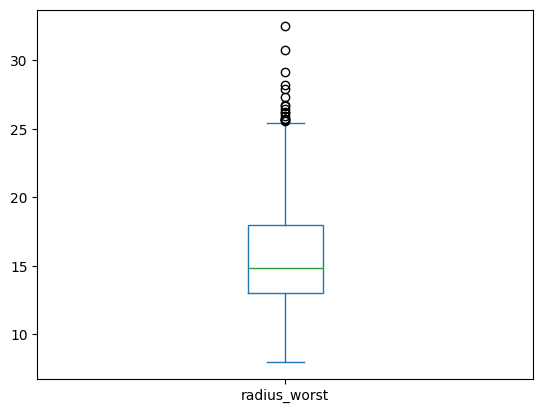

In [17]:
df['radius_worst'].plot(kind='box')
c=np.where(df['radius_worst'] >= 29)
df.drop(df.index[c], inplace=True)

In [18]:
# Criação do vetor de classificação Benigno e Maligno
y = df.iloc[:, 1].values
y = np.where(y == 'B', 1, -1)
X = df.iloc[:, [2,12,22]].values
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

<function matplotlib.pyplot.show(close=None, block=None)>

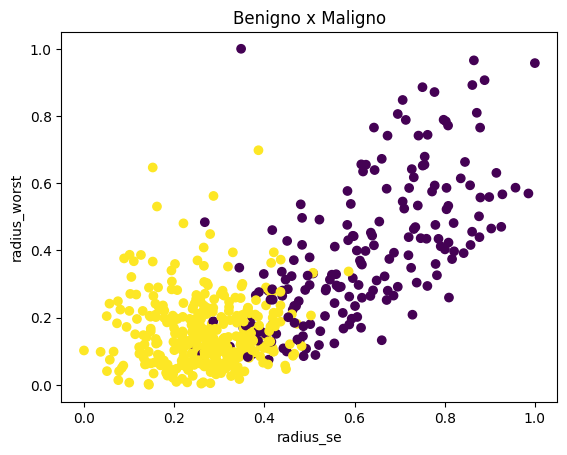

In [19]:
# plotando o gráfico para verificação se as amostras são linearmente separáveis
plt.scatter(X[:,2],X[:,1],c=y)
plt.title("Benigno x Maligno" )
plt.xlabel('radius_se')
plt.ylabel('radius_worst')
plt.show

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=0.30)
p = Perceptron(random_state=42, eta0=0.001, penalty='elasticnet')
p.fit(X_train, y_train)

,penalty,'elasticnet'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,0.001
,n_jobs,None
,random_state,42


In [21]:
prediction_train = p.predict(X_train)
train_score = accuracy_score(prediction_train, y_train)
print("A acurácia com dados de treinamento: ", train_score)

A acurácia com dados de treinamento:  0.9140625


In [22]:
prediction_test = p.predict(X_test)
test_score = accuracy_score(prediction_test, y_test)
print("A acurácia com dados de teste: ", test_score)

print(classification_report(prediction_test, y_test))
print("Número de épocas: ", p.n_iter_)

A acurácia com dados de teste:  0.9030303030303031
              precision    recall  f1-score   support

          -1       0.87      0.87      0.87        60
           1       0.92      0.92      0.92       105

    accuracy                           0.90       165
   macro avg       0.90      0.90      0.90       165
weighted avg       0.90      0.90      0.90       165

Número de épocas:  6


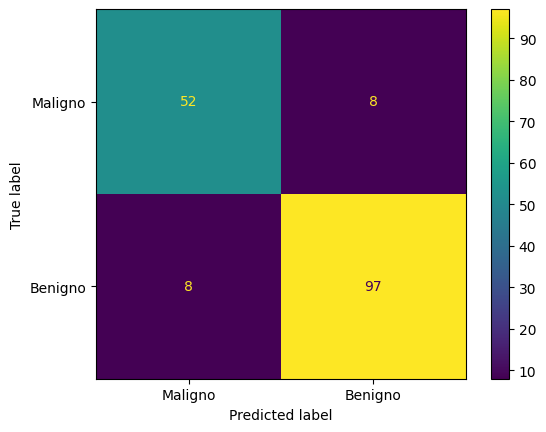

In [23]:
conf_matrix = confusion_matrix(y_test, prediction_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Maligno','Benigno'])
cm_display.plot()